# Abstrakt

Bitkoin (eng. *bitcoin, BTC*) sve više privlači pažnju mnogih investitora, istraživača, trgovaca i medija. Ono što je neobično, i otežava analizu i predviđanje vrednosti ove kriptovalute (eng. *cryptocurrency*), jeste ogromna nestabilnost u ceni. Dok neke studije koriste statističke i ekonometrijske načine da otkriju, odnosno predvide cenu bitkoina, eksperimenti sa modelima za predviđanje koji se koriste kao alati za podršku odlučivanju u investiranju, još uvek su retki.

U ovom radu je razmotren problem predviđanja kretanja cene bitkoina. Upotrebom različitih modela mašinskog učenja, cilj je pronaći najbolji, koji pruža najtačnije prognoze.

# Uvod

Kriptovaluta je digitalna, virtuelna valuta koja ne postoji u fizičkom smislu, a uz pomoc koje se sve transakcije obavljaju elektronskim putem. Najpoznatija, a ujedno i prva kriptovaluta koja je nastala je bitkoin.

Postoje mnogo različitih metoda za predviđanje cene kriptovaluta koje se mogu izvesti pomoću neuronskih mreža i raznih tehnika mašinskog učenja. Da bi rezultati predviđanja bili bolji, ponekad je potrebno razumeti trend kretanja vrednosti (odnosno cene) kriptovalute tokom dugoročnog perioda.

U ovom projektu su istraženi različiti pristupi i metode mašinskog ucenja i dubokog ucenja za analizu bitkoina. Nad podacima, koji su pretprocesirani (pročišćeni od NaN vrednosti, filtrirani) izvršena je podela na skup za treniranje i skup za testiranje, a zatim primenjena *min-max* normalizacija. Za kompilaciju mreža je koriscen Adam optimizator, a pri treniranju različit broj epoha i veličina *batch*a. Za brže zaustavljanje treniranja mreže korišćena je *callback* funkcija *EarlyStopping* biblioteke *Keras*. Za svaki model je izračunata srednje kvadratna greška (eng. *mean squared error, MSE*), srednja apsolutna greška (eng. *mean absolute error, MAE*), funkcija gubitka (eng. *loss*) i koeficijent determinacije (eng. *coefficient of determination, R2 score*).

Projekat čini nekoliko .ipynb fajlova, gde je u svakom od njih nad podacima demonstriran drugačiji model. Učitavanje, prikaz i pretprocesiranje podataka je urađeno u posebnoj Jupiter svesci, dok je filtriranje atributa urađeno u svakom od fajlova zbog toga što je za različite modele korišćen različit skup atributa.

Korišćeni modeli:
- Binomna Logistička Regresija
- Metod potpornih vektora
- Rekurentna neuronska mreza GRU
- Rekurentna neuronska mreza LSTM

# Cilj rada

Cilj rada je analiza datog skupa podataka, istraživanje i demonstracija različitih metoda mašinskog učenja nad sekvencijalnim podacima, utvrđivanje da li će vrednost bitkoina na kraju dana skočiti ili opasti u odnosu na početnu vrednost (ovo je opisano atributima 'Open' i 'Close') i predviđanje vrednosti bitkoina za $n$ dana.

Ovo istraživanje uključuje i upoređivanje različitih tehnika koje su implementirane u projektu i pronalazi najefikasniji model koji daje najtačnija predviđanja. Modeli *Long short-term memory (LSTM)* i *Gated recurrent unit (GRU)* daju dobre rezultate (visoku tačnost) pri radu sa ovakvom vrstom podataka, te su i oni, pored nekih klasičnih pristupa, implementirani u ovom projektu.

## Skup podataka

Skup podataka koji je korišćen za potrebe ovog projekta je preuzet sa linka ................ sa Kaggle platforme. Skup podataka predstavlja *stock market* sa vremenskim serijama (eng. time series) koje prezentuju promenu vrednosti kriptovalute bitkoin tokom 9 godina (2012-2021). Uključuje 8 atributa i 4 857 377 instanci prikupljenih u obzervacijama u ovom periodu.

**Atributi:**

0. Timestamp
1. Open
2. High
3. Low
4. Close
5. Volume_(BTC)
6. Volume_(Currency)
7. Weighted_Price
 
Svi atributi predstavljeni su numeričkim vrednostima. U skupu postoje instance koje sadrže i $NaN$ vrednosti (koje su za potrebe ovog projekta eliminisane iz skupa). Radi čitljivosti, ali i filtriranja podataka, biće kreirana još jedna kolona odnosno atribut *'Date'*, čije će vrednosti biti izvedene iz kolone *'Timestamp'*.

In [13]:
import pandas as pd

data = pd.read_csv('data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


**Iz datog izveštaja možemo zaključiti sledeće:**
- Skup podataka sadrži 4 857 377 instanci
- Indeksi se kreću od 0 do 4 857 376
- Skup podataka sadrži 8 atributa (kolona)
- Vrednosti atributa 'Timestamp' su celobrojne - tipa int64
- Vrednosti preostalih sedam atributa su realne vrednosti - tipa float64

**Informacije o proseku, minimalnoj i maksimalnoj vrednosti nekog atributa i drugo, mogu se dobiti metodom describe().**

In [7]:
data.describe()

Timestamp          Open          High           Low         Close  \
count  4.857377e+06  3.613769e+06  3.613769e+06  3.613769e+06  3.613769e+06   
mean   1.471301e+09  6.009024e+03  6.013357e+03  6.004488e+03  6.009014e+03   
std    8.428019e+07  8.996247e+03  9.003521e+03  8.988778e+03  8.996360e+03   
min    1.325318e+09  3.800000e+00  3.800000e+00  1.500000e+00  1.500000e+00   
25%    1.398179e+09  4.438600e+02  4.440000e+02  4.435200e+02  4.438600e+02   
50%    1.471428e+09  3.596970e+03  3.598190e+03  3.595620e+03  3.597000e+03   
75%    1.544288e+09  8.627270e+03  8.632980e+03  8.621090e+03  8.627160e+03   
max    1.617149e+09  6.176356e+04  6.178183e+04  6.167355e+04  6.178180e+04   

       Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  3.613769e+06       3.613769e+06    3.613769e+06  
mean   9.323249e+00       4.176284e+04    6.008935e+03  
std    3.054989e+01       1.518248e+05    8.995992e+03  
min    0.000000e+00       0.000000e+00    3.800000e+00  
25%    4.097759e-01       4.521422e+02    4.438306e+02  
50%    1.979811e+00       3.810124e+03    3.596804e+03  
75%    7.278216e+00       2.569821e+04    8.627637e+03  
max    5.853852e+03       1.390067e+07    6.171621e+04

# Modeli korišćeni u projketu

## Logistička regresija

Logistička regresija se koristi za rešavanje klasifikacionih problema. Ovaj model opisuje vezu između prediktora koji mogu biti neprekidni, binarni, kategorički, i kategoričke zavisne promenljive (koja može biti binarna - na osnovu nekih prediktora predviđamo da li će se nešto desiti ili ne).

Model logističke regresije se može posmatrati kao probabilistički klasifikator - izlaz modela je $P(y = 1|x)$, gde je y ciljna promenljiva, a x ulaz (na primer jedan atribut). Dakle, izlaz nije samo klasifikaciona odluka, već se ovaj model koristi za modelovanje verovatnoće pripadanja svakoj kategoriji za dat skup prediktora. U zavisnosti od tipa zavisne promenljive postoje različite vrste (verzije) logističkih regresija. U ovom radu korišćena je osnovna verzija logisticke regresije, a to je binarna.

Logistička regresija je dobila naziv po logističkoj/sigmoidnoj funkciji:

$$g(z) = \frac{1}{1+e^{-z}}$$

Logistička funkcija sabija interval $(-\infty, +\infty)$ na opseg $[0, 1]$. To omogućava da se na izlazu dobije verovatnoća da je $y = 1$. Kako modeluje uslovnu raspodelu, ovaj model je probabilistički diskriminativni. Na narednoj slici prikazana je formulacija modela. Funkcija $L(u, v) = −u log v − (1 − u) log(1 − v)$ predstavlja funkciju greške koja se naziva unakrsnom entropijom i često se koristi u kontekstu probabilističke klasifikacije.

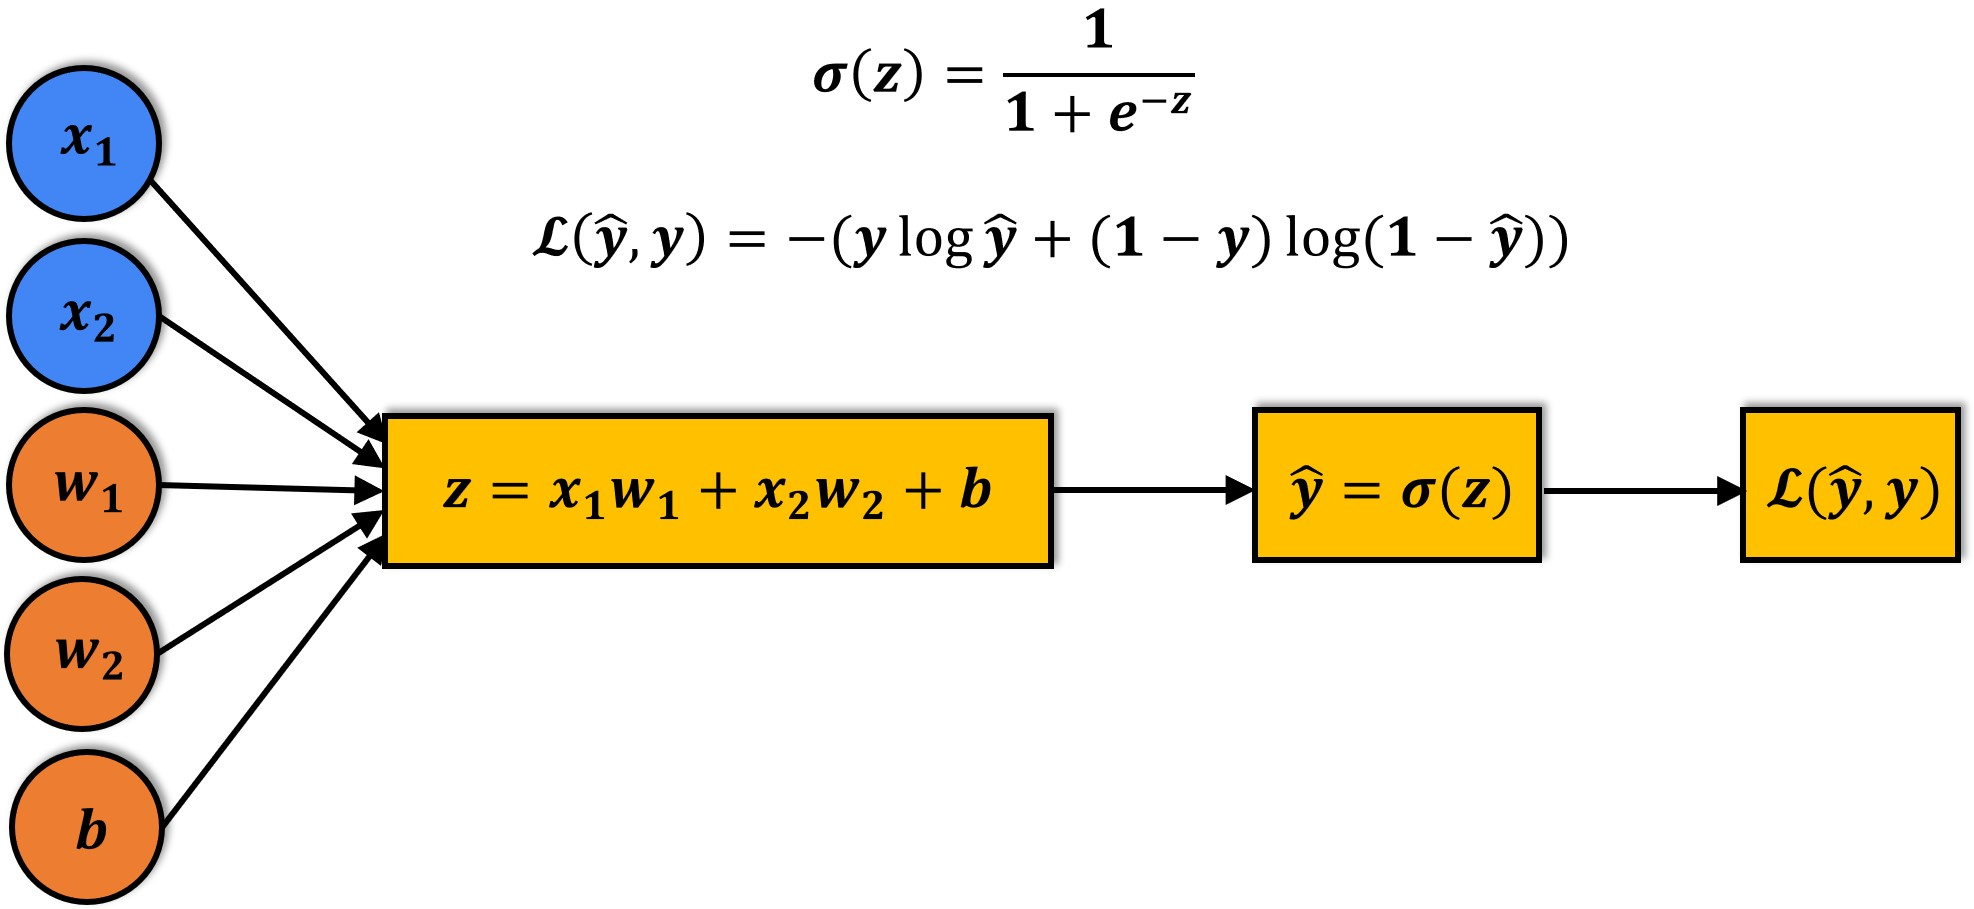

### Binarna logistička regresija - zavisna promenljiva je binarna

Binarna logistička regresija modeluje verovatnocu pripadanja određenoj klasi ili dešavanje događaja kao što su: proći/pasti (test) (eng. *pass/fail*), pobediti/izgubiti (eng. *win/lose*) ili zdrav/bolestan (eng. *healthy/sick*). Kod binarne logističke regresije **zavisna promenljiva je binarna** i kodira se sa 0 ili 1 i **postoji najmanje jedna nezavisna (prediktorska) promenljiva**.

## Metod potpornih vektora za regresiju - SVR

Problem regresije je pronaći funkciju koja aproksimira preslikavanje ulaznog domena u realne brojeve. Metod potpornih vektora za regresiju (eng. *Support Vector Regression, SVR*) koristi iste principe kao SVM, ali služi za rešavanje regresionih problema (predviđanje neprekidne promenljive). Ipak, jedna važna tehnička razlika u odnosu na klasifikaciju je u tome što nema smisla tražiti tačna predviđanja, kao što je to bio zahtev u linearno razdvojivom slučaju kod klasifikacije. 

Kod binarne klasifikacije postoje dva moguća ishoda: 1 i −1, ali nije potrebno da model da baš vrednost 1 ili −1, već se sve vrednosti koje linearni model daje zaokružuju na njih. U slučaju regresije (gde postoji kontinuum ishoda) zahtev za tačnom jednakošću bio bi prejak, jer podaci retko predstavljaju merenja sa savršenom tačnošću. Odnosno, ako podaci sadrže grešku, štetno bi bilo insistirati da se ta greška nauči. Zbog toga se uvodi parametar tolerancije ε koji predstavlja razliku između predviđanja i stvarne vrednosti. Osnovna formulacija modela je data na narednoj slici.

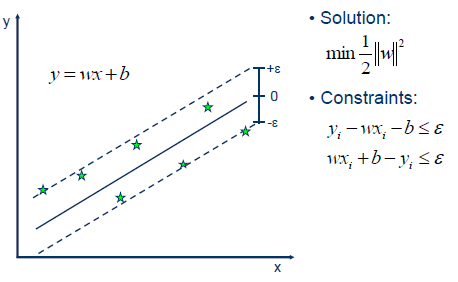

Iz ograničenja sledi da se predviđanja ne mogu mnogo razlikovati od pravih vrednosti. Minimizacija norme sprečava izbor modela koji brzo menja vrednosti (umanjuje prilagodljivost). Ova formulacija ne dozvoljava greške u predviđanjima (osim za fiksiranu vrednost ε). Tolerancija na greške se postiže uvođenjem novih promenljivih ξ (u iznad prikazanu formulaciju).

Metod potpornih vektora za regresiju je drugačiji od ostalih regresionih modela. Dok drugi modeli linearne regresije pokušavaju da minimizuju grešku između predviđene i stvarne vrednosti, Metod potpornih vektora za regresiju pokušava da *fituje* najbolju pravu između predefinisane vrednosti greške. SVR pokušava da klasifikuje sve predviđene linije u 2 tipa - one koje prolaze kroz *error* granicu (prostor podeljen dvema paralelnim pravama) i one koje ne prolaze tu. One prave koje ne prolaze ovu granicu se ne razmatraju jer je razlika između predviđene i stvarne vrednosti premašila (odnosno prekoračila) prag greške (eng. *error threshold*), 𝞮 (epsilon). Prave koje prolaze, razmatraju se za potencijalne potporne vektore za predviđanje nepoznatih vrednosti (eng. *to predict the value of an unknown*). SVR pruža fleksibilnost pri definisanju vrednosti (odnosno količine) greške koja se prihvata (odnosno koju model prihvata) i nalazi prikladnu pravu (ili hiperravan u višoj dimenziji) koju prilagođava podacima (eng. *to fit the data*).

## Rekurentne neuronske mreže

**Rekurentne neuronske mreže** su duboke, veštačke, neuronske mreže karakteristične po rekurentnoj vezi između ulaza i izlaza njenih neurona ili slojeva i po sposobnosti učenja sekvenci. Ove mreže predstavljaju modele sa dvosmernim protokom podataka. Naime, mreže propagacije unapred propagiraju podatke od ulaza ka izlazu, dok RNN propagiraju podatke od daljih stadijuma (iz prošlog vremenskog koraka?) procesiranja ka ranijim. To omogućava rekurentnim neuronskim mrežama da održe određeno pamćenje. Rekurentne neuronske mreže imaju arhitekturu specijalizovanu za obradu **sekvencijalnih podataka**, kao što su **rečenice prirodnog jezika** i **vremenske serije**.

RNN odlikuje njihova "memorija" jer uzimaju informacije iz prethodnih ulaza kako bi uticali na trenutni ulaz i izlaz. Dok tradicionalne duboke neuronske mreže pretpostavljaju da su ulazi i izlazi nezavisni jedni od drugih, izlaz rekurentnih neuronskih mreža zavisi od prethodnih elemenata sekvence. Iako bi budući događaji takođe mogli biti od pomoći pri određivanju izlaza date sekvence, jednosmerne rekurentne neuronske mreže ne mogu da računaju na ove događaje u svojim predviđanjima. Kao i mreže propagacije unapred i neuronske mreže (CNNs), rekurentne neuronske mreže za učenje koriste skup podataka za trening. Dve najznačajnije RNN mreže su LSTM i GRU, i one će biti demonstrirane u ovom projektu i opisane u nastavku.

**Vremenske serije** su kolekcije uzoraka/obzervacija (eng. *observations*) dobijenih tokom merenja koje se ponavlja kroz vreme. Prilikom predstavljanja ovih uzoraka na grafiku, jedna od osa bi predstavljala vreme.

Vremenske serije su korisne za:

- Praćenje časovnih, dnevnih, nedeljnih ili mesečnih vremenskih prognoza
- Praćenje promena u performansama aplikacija
- Medicinske uređaje - za vizualizaciju talasa u realnom vremenu
- Praćenje evidencija na mreži (eng. *network logs*)

Primeri vremenskih serija:

- vremenske prognoze
- ekonomski pokazatelji (eng. *economic indicators*)
- vrednosti raznih metrike vezane za zdravlje pacijenta (eng. *patient health evolution metrics*)
- vrednosti metrika za servere (eng. *server metrics*)
- praćenje performansi aplikacija (eng. *application performance monitoring*)
- događaji (eng. *events*), klikovi i drugi tipovi analitičkih podataka

Postoji više vrsta RNN. U ovom radu korišćena je jedna od njih, a to je **Dugo kratkoročna memorija**. Vrste RNN su:
- Potpuno rekurentne RNN
- Hopfildova mreža
- Bolcmanova mašina
- Jednostavne rekurentne mreže
- Eho stanje mreže
- Dugo kratkoročna memorija LSTM
- Dvosmerne RNN
- Stohastičke neuronske mreže


### Dugo kratkoročna memorija

Dugo kratkoročna memorija predstavlja modifikaciju rekurentne neuronske mreže zamenjivanjem perceptrona s “LSTM jedinicom” koja “pamti” informacije proizvoljno dugo. To je veštačka neuronska mreža koja se razlikuje od tradicionalnih rekurentnih neuronskih mreža po tome što eliminise problem nestajućeg gradijenta. Osim toga, ona može da opslužuje signale koji imaju mešavinu komponenti visokih i niskih frekvencija. LSTM rekurentne neuronske mreže su nadmašile ostale rekurentne neuronske mreže i druge metode učenja sekvenci u brojnim primenama (npr. učenje jezika i prepoznavanje rukopisa). Sve to omogućava bogata struktura “LSTM jedinice” koja ima kapije za “ulaz u jedinicu”, za “zaboravljanje”, i za “izlaz iz jedinice”.

# Zaključak

U ovom radu su implementirani i upoređeni različiti modeli - Logistička regresija, SVM, GRU, LSTM - radi nalaženja modela koji daje najrelevantnija, najpreciznija predviđanja. Ispostavlja se da LSTM pruža najbolje predikcije...

# #TODO